<h1>Sommaire<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Petit-tutoriel-accompagné-autour-de-Scikit-Learn-et-les-données-de-Boston" data-toc-modified-id="Petit-tutoriel-accompagné-autour-de-Scikit-Learn-et-les-données-de-Boston-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Petit tutoriel accompagné autour de Scikit-Learn et les données de Boston</a></span><ul class="toc-item"><li><span><a href="#Un-rapide-passage-vers-les-correlations" data-toc-modified-id="Un-rapide-passage-vers-les-correlations-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Un rapide passage vers les correlations</a></span></li></ul></li><li><span><a href="#Preprocessing-des-données-:-Normalisation" data-toc-modified-id="Preprocessing-des-données-:-Normalisation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocessing des données : Normalisation</a></span></li><li><span><a href="#On-sépare-les-données-dans-2-ensembles" data-toc-modified-id="On-sépare-les-données-dans-2-ensembles-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>On sépare les données dans 2 ensembles</a></span><ul class="toc-item"><li><span><a href="#Régression-Linéaire" data-toc-modified-id="Régression-Linéaire-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Régression Linéaire</a></span></li></ul></li></ul></div>

# Petit tutoriel accompagné autour de Scikit-Learn et les données de Boston

Vous trouver le guide complet de Scikit-Learn ici
https://scikit-learn.org/stable/_downloads/scikit-learn-docs.pdf

In [1]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
Y = pd.DataFrame(boston.target)

Je vérifie qu'il y a bien les données attendu dans le tableau X

In [24]:
X[["CRIM"] > 5].plot.bar()

TypeError: '>' not supported between instances of 'list' and 'int'

Même chose pour Y

In [25]:
Y

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


Je donne un nom de colonne un peu plus parlant pour Y, que 0

In [26]:
Y.columns = ["Prix"]

In [27]:
Y.head()

,Prix
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


Je copie le tableau X

In [28]:
df = X.copy()

Je rajoute une colonne dans df

In [29]:
#df["prix"] = Y

## Un rapide passage vers les correlations

In [30]:
import matplotlib.pyplot as plt
corrdf2 = df.corr()
plt.figure(figsize=(15,15))
corrdf2.style.background_gradient(cmap='coolwarm').set_precision(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54


<Figure size 1080x1080 with 0 Axes>

Cela donne aussi, une idée de corelation entre les variables (dans le TD1 j'ai aussi regardé les courbes).

Pour info, voici une autre maniere de représenter le même graphe. Cette fois ci j'utilise sns

<AxesSubplot:>

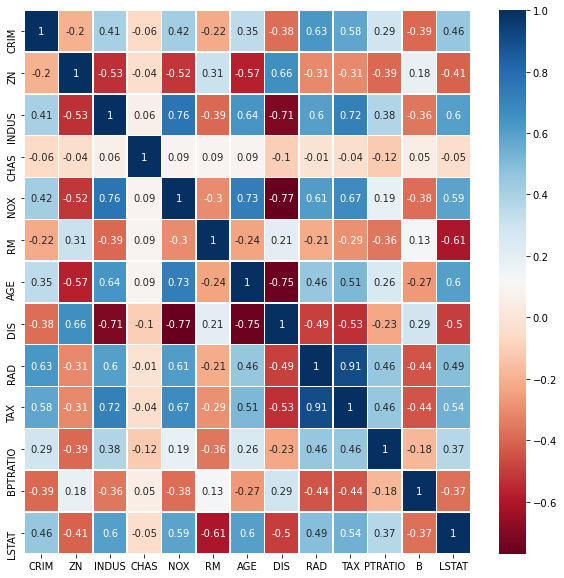

In [31]:
import seaborn as sns
corr=df.corr().round(2)
plt.figure(figsize=(10,10))
sns.heatmap(corr.round(2), linewidth=0.5, cmap="RdBu", annot=True)

Justifier les correlations que vous voyez ou ne voyez pas dans votre note note-book

# Preprocessing des données : Normalisation

Je normalise les données avec la fonction MinMaxScaler

In [32]:
import sklearn.preprocessing as preprocessing
 
minmax = preprocessing.MinMaxScaler()
# X est une matrice avec des chiffre floatant
minmax.fit(X)
X_minmax = minmax.transform(X)

In [33]:
import sklearn.preprocessing as preprocessing
 
minmax = preprocessing.MinMaxScaler()
# X est une matrice avec des chiffre floatant
# minmax.fit(X)
# X_minmax = minmax.transform(X)
X_minmax = minmax.fit_transform(X)

un exemple de l'effet de la normalisation plus parlant

In [34]:
import sklearn.preprocessing as preprocessing
import numpy as np

XX = np.random.randint(2, 10, size=(4, 2))
XX2 = np.random.randint(100, 10000, size=(4, 2))
XX = np.concatenate((XX, XX2), axis=1)
print("Matrice Originale")
print(XX)

#### min-max scaler

minmax = preprocessing.MinMaxScaler()
minmax.fit(XX)
X_minmax = minmax.transform(XX)
print("\n\nLa matrice une fois transformée avec la fonction min-max scaler")
print(X_minmax)

Matrice Originale
[[   8    3 6202 9559]
 [   3    3 7048 4352]
 [   5    9 6602 4489]
 [   4    3 9480 7882]]


La matrice une fois transformée avec la fonction min-max scaler
[[1.         0.         0.         1.        ]
 [0.         0.         0.2580842  0.        ]
 [0.4        1.         0.12202563 0.02631074]
 [0.2        0.         1.         0.67793355]]


In [35]:
import sklearn.preprocessing as preprocessing

std = preprocessing.StandardScaler()
std.fit(X)
X_std = std.transform(X)

un exemple de l'effet de la normalisation plus parlant

In [36]:
import sklearn.preprocessing as preprocessing
import numpy as np

XX = np.random.randint(2, 10, size=(4, 2))
XX2 = np.random.randint(100, 10000, size=(4, 2))
XX = np.concatenate((XX, XX2), axis=1)
print("Matrice Originale")
print(XX)

std = preprocessing.StandardScaler()
std.fit(XX)
X_std = std.transform(XX)
print("\n\nLa matrice une fois transformée avec la fonction min-max scaler")
print(X_std)

Matrice Originale
[[   4    5 6868 7151]
 [   6    7  502 8424]
 [   4    2 1808 1302]
 [   4    8 4878 3546]]


La matrice une fois transformée avec la fonction min-max scaler
[[-0.57735027 -0.21821789  1.33912779  0.72203224]
 [ 1.73205081  0.65465367 -1.20257987  1.17143796]
 [-0.57735027 -1.52752523 -0.68114252 -1.34283347]
 [-0.57735027  1.09108945  0.5445946  -0.55063674]]


# On sépare les données dans 2 ensembles

Maintenant je prépare les 2 jeux de données, il y donc 4 variables : X_train, X_test, Y_train, Y_test

Ici, je n'ai pris que 20 % de données dans l'ensemble test

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df.drop(columns =[ 'ZN','CHAS','PTRATIO', 'B']),
                                                    Y, test_size=0.2, random_state=42)

print('nombre de données dans le training set:', X_train.shape[0])
print('nombre de données dans le testing set    :', X_test.shape[0])
print('nombre de features/dimensions/features     :', X_test.shape[1])

nombre de données dans le training set: 404
nombre de données dans le testing set    : 102
nombre de features/dimensions/features     : 9


## Régression Linéaire

In [39]:
model.score(X_test, Y_test)

NameError: name 'model' is not defined

In [40]:
a = Y_test.astype(str)

In [41]:
a.dtypes

Prix    object
dtype: object

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

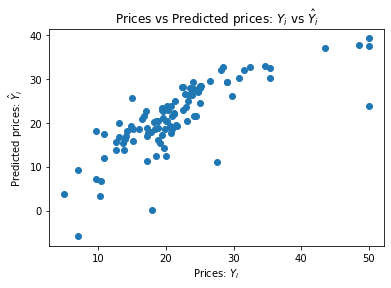

In [42]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [43]:
import sklearn.metrics as metrics
print("Les premieres 5 prediction {}".format(Y_pred[:5]))
print("Les premieres 5 valeurs {}".format(Y_pred[:5]))

mse = metrics.mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error {}".format(mse))

Les premieres 5 prediction [[28.00828631]
 [32.83197073]
 [15.47741945]
 [26.63205576]
 [18.55509275]]
Les premieres 5 valeurs [[28.00828631]
 [32.83197073]
 [15.47741945]
 [26.63205576]
 [18.55509275]]
Mean Squared Error 29.8496428621843


In [ ]:
print(model.coef_)
print(model.intercept_)